In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# part1 explore data

In [7]:
#found missing data
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

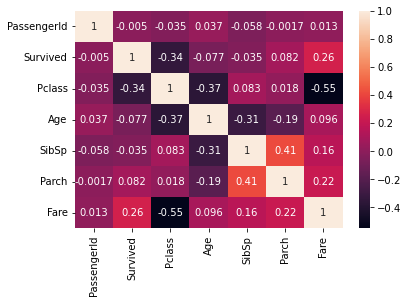

In [6]:
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:>

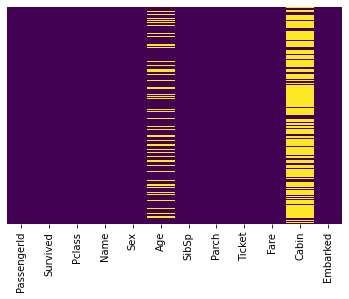

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

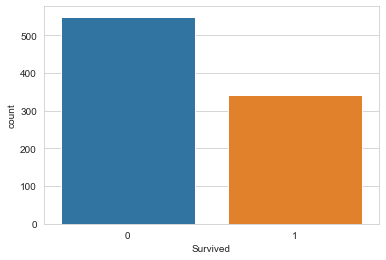

In [14]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

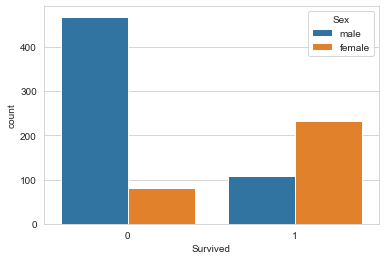

In [16]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

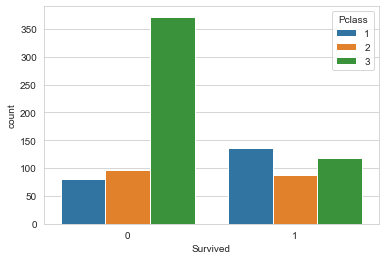

In [17]:
sns.countplot(x='Survived',data=train,hue='Pclass')

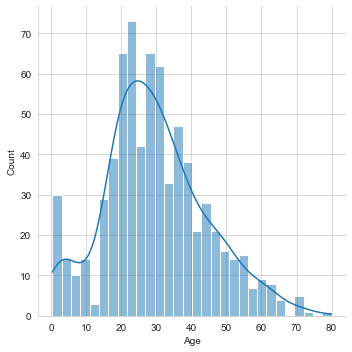

In [20]:
sns.displot(train['Age'].dropna(),kde=True,bins=30)

<AxesSubplot:ylabel='Frequency'>

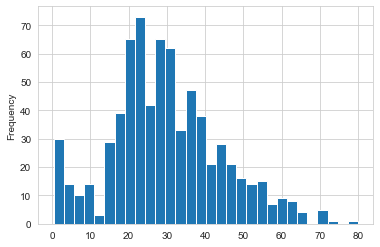

In [22]:
train['Age'].plot.hist(bins=30)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

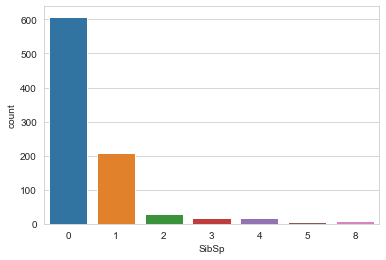

In [27]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

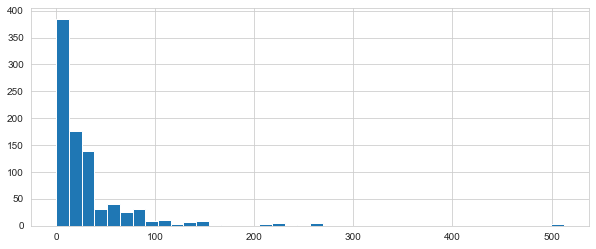

In [30]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [31]:
import cufflinks as cf

In [32]:
cf.go_offline()

In [33]:
train['Fare'].iplot(kind='hist',bins=50)

# clean data
## fix missing values

<AxesSubplot:>

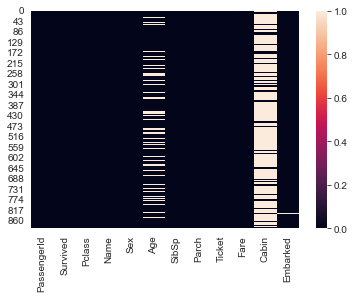

In [34]:
sns.heatmap(train.isnull())

In [ ]:
# fill null data in age with the average age of the class that the instance belongs to

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

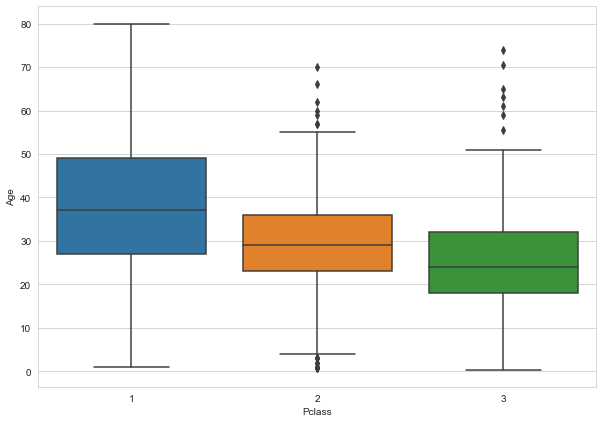

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [38]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): 
        
        if Pclass ==1 :
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24 
        
    else:        
        return Age

In [40]:
train['Age']= train[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

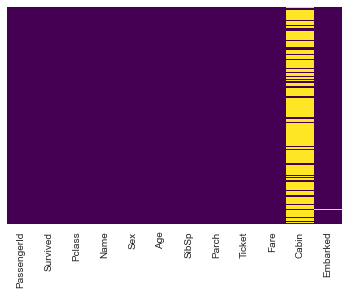

In [44]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
# because of so much missing information in this column (cabin) it is better to remove it
train.drop('Cabin',axis=1,inplace=True)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

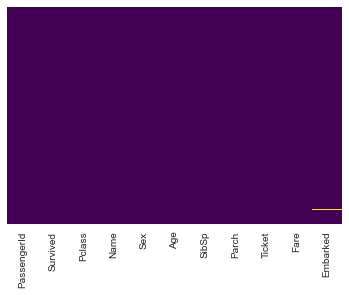

In [47]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
train.dropna(inplace=True)

<AxesSubplot:>

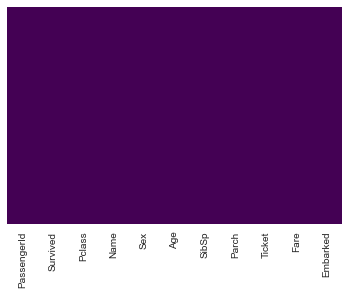

In [49]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [50]:
# creating a dummy variable (like convert categorical values to a number)

In [53]:
# because with male value we can predict the female value we droped female
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [57]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [59]:
pd.concat([train,sex,embark],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [61]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [64]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [65]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


# machine learning

In [66]:
x= train.drop('Survived',axis=1)
y= train['Survived']

In [67]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logModel = LogisticRegression()

In [79]:
logModel.fit(X_train,y_train)

LogisticRegression()

In [80]:
predictions= logModel.predict(X_test)

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       163
           1       0.72      0.49      0.58       104

    accuracy                           0.73       267
   macro avg       0.72      0.68      0.69       267
weighted avg       0.73      0.73      0.71       267



In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[143  20]
 [ 53  51]]
